# Step 1: Reading about data set

Data Science Fields Salary Categorization Dataset contains 9 columns :

* Working Year - 2020, 2021, 2022 
* Designation 
* Experience - Entry level, Mid level, Senior level, Executive level
* Employment Status - Part time, Full time, Contract, Freelance 
* Gross Salary In Rupees 
* Employee Location - ISO 3166
* Company Location 
* Company Size
* Remote Working Ratio 

https://www.kaggle.com/datasets/whenamancodes/data-science-fields-salary-categorization?resource=download

![](https://assets.materialup.com/uploads/63ea9d4f-e3e2-4a03-8bf9-23a0fbe9aecc/preview.jpg)

# Step 2: Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\Data_Science_Fields_Salary_Categorization.csv


In [2]:
DESIGNATION = []

In [3]:
# Parameters
DESIGNATION = ["Data Scientist"]


# Step 3: Importing the data set

In [4]:
# Read the dataset above
df = pd.read_csv('./data/Data_Science_Fields_Salary_Categorization.csv')


df = df[df['Designation'].isin(DESIGNATION)]

# Display the 5 rows
df.sample(5)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
369,370,2022,Data Scientist,SE,FT,"13,526,815.00",US,US,M,100
251,252,2021,Data Scientist,EN,FT,"7,161,255.00",US,US,S,100
71,72,2020,Data Scientist,MI,FT,"3,357,594.00",FR,FR,S,50
195,196,2021,Data Scientist,MI,FT,"11,696,717.00",US,US,L,50
539,540,2022,Data Scientist,MI,FT,"8,124,046.00",US,US,M,0


In [5]:
# delete one by one like column is 'Unnamed: 0' so use it's name
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          143 non-null    int64 
 1   Designation           143 non-null    object
 2   Experience            143 non-null    object
 3   Employment_Status     143 non-null    object
 4   Salary_In_Rupees      143 non-null    object
 5   Employee_Location     143 non-null    object
 6   Company_Location      143 non-null    object
 7   Company_Size          143 non-null    object
 8   Remote_Working_Ratio  143 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 11.2+ KB


In [7]:
df.describe()

,Working_Year,Remote_Working_Ratio
count,143.000000,143.000000
mean,2021.391608,63.986014
std,0.731918,43.364486
min,2020.000000,0.000000
25%,2021.000000,0.000000
50%,2022.000000,100.000000
75%,2022.000000,100.000000
max,2022.000000,100.000000


# Step 4: Exploring the salary distribution among disciplines over 3 years

In [8]:
#for convenience, it was decided to count salaries in dollars, and the exchange rate was based on 09/15/2022, which is 1 rupees = 0.013 dollars.

df['Salary_In_Rupees'] = df['Salary_In_Rupees'].str.replace(',', '')
df['Salary_In_Rupees'] = pd.to_numeric(df['Salary_In_Rupees'])
df['Salary_In_Dollars'] = df['Salary_In_Rupees']*0.013

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          143 non-null    int64  
 1   Designation           143 non-null    object 
 2   Experience            143 non-null    object 
 3   Employment_Status     143 non-null    object 
 4   Salary_In_Rupees      143 non-null    float64
 5   Employee_Location     143 non-null    object 
 6   Company_Location      143 non-null    object 
 7   Company_Size          143 non-null    object 
 8   Remote_Working_Ratio  143 non-null    int64  
 9   Salary_In_Dollars     143 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 12.3+ KB


<Figure size 2000x6000 with 0 Axes>

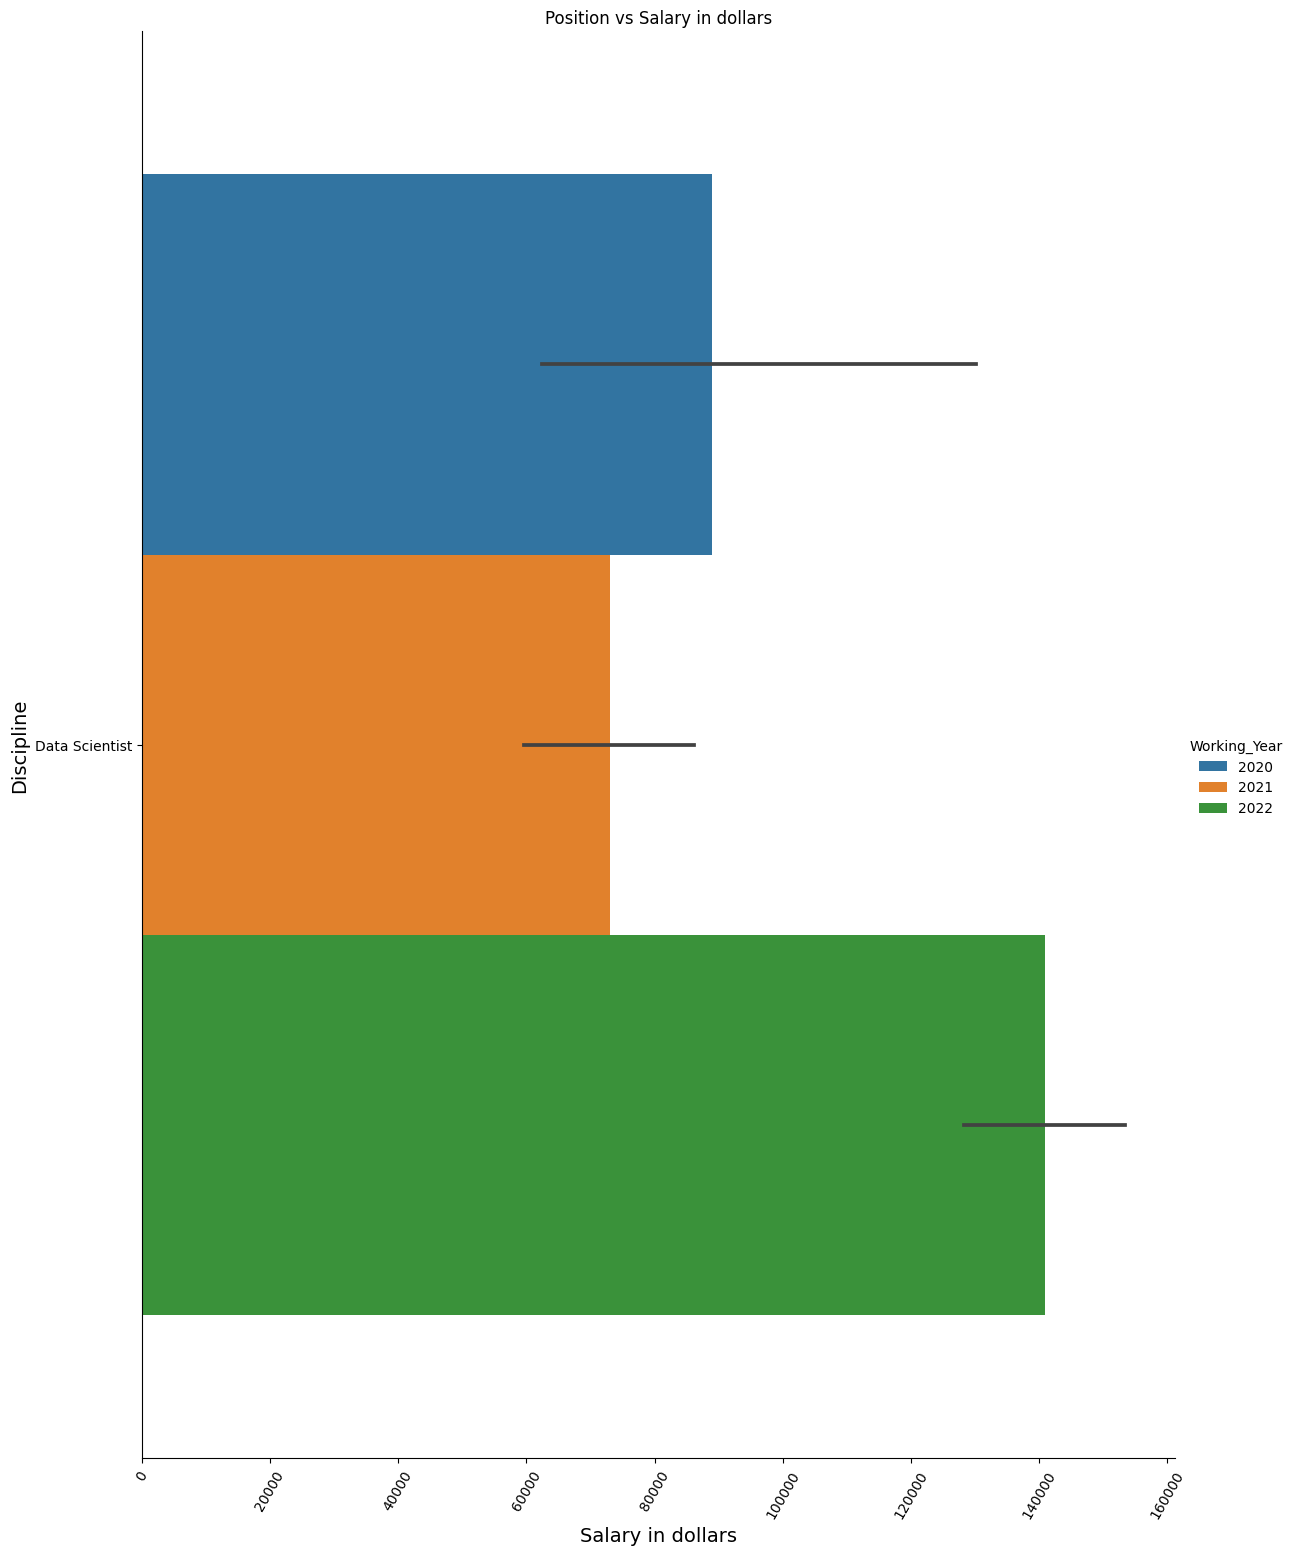

In [9]:
plt.figure(figsize = (20,60))

sns.catplot(x = 'Salary_In_Dollars',
            y = 'Designation',
            kind = "bar",
            height = 15,
            hue = 'Working_Year',
            aspect = 0.8,
            data = df).set(title = "Position vs Salary in dollars");

plt.xticks(rotation = 60)
plt.xlabel("Salary in dollars",fontsize=14)
plt.ylabel("Discipline",fontsize=14)

plt.show()

# Step 5: Exploring the salary distribution among disciplines depending on experience

<Figure size 2000x6000 with 0 Axes>

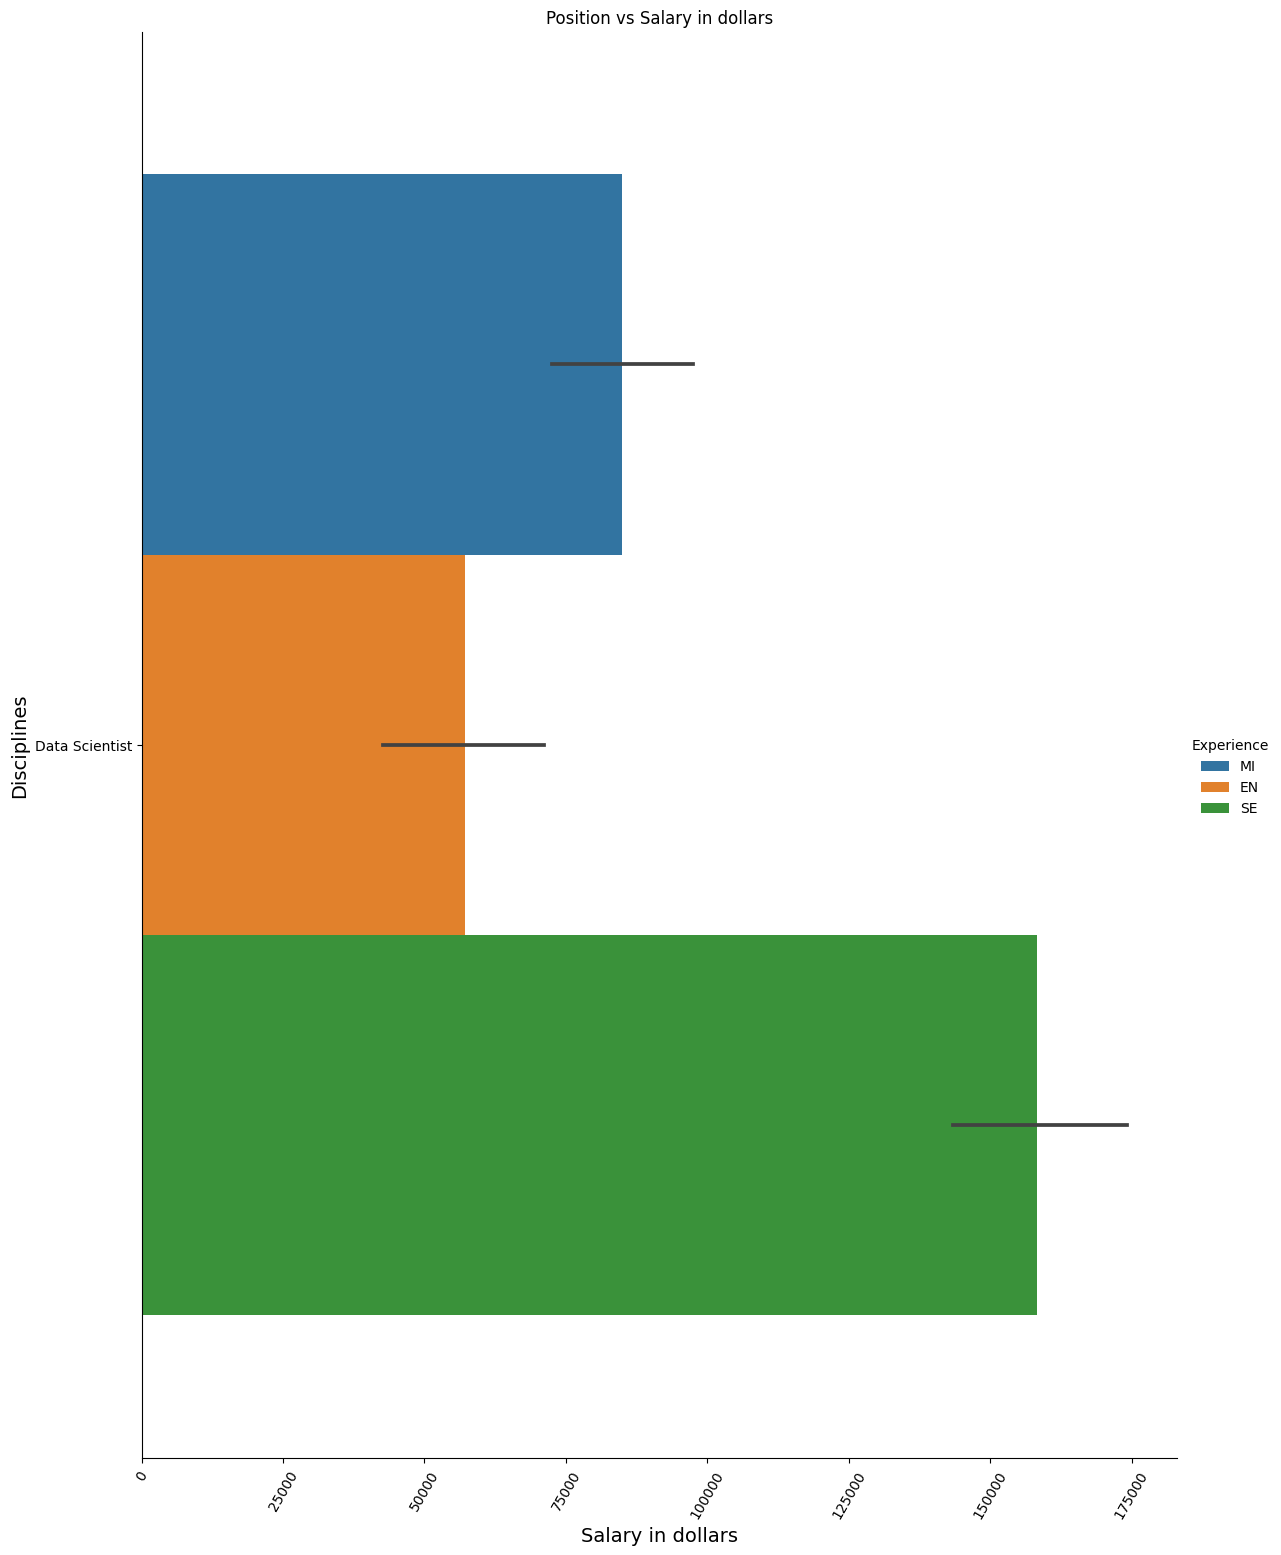

In [10]:
plt.figure(figsize = (20,60))

sns.catplot(x = 'Salary_In_Dollars',
            y = 'Designation',
            kind = "bar",
            hue = 'Experience',
            height = 15,
            aspect = 0.8,
            data = df).set(title = "Position vs Salary in dollars");

plt.xticks(rotation = 60)
plt.xlabel("Salary in dollars",fontsize=14)
plt.ylabel("Disciplines",fontsize=14)

plt.show()

# Step 6: Exploring the salary distribution among disciplines depending on employment status

<Figure size 2000x6000 with 0 Axes>

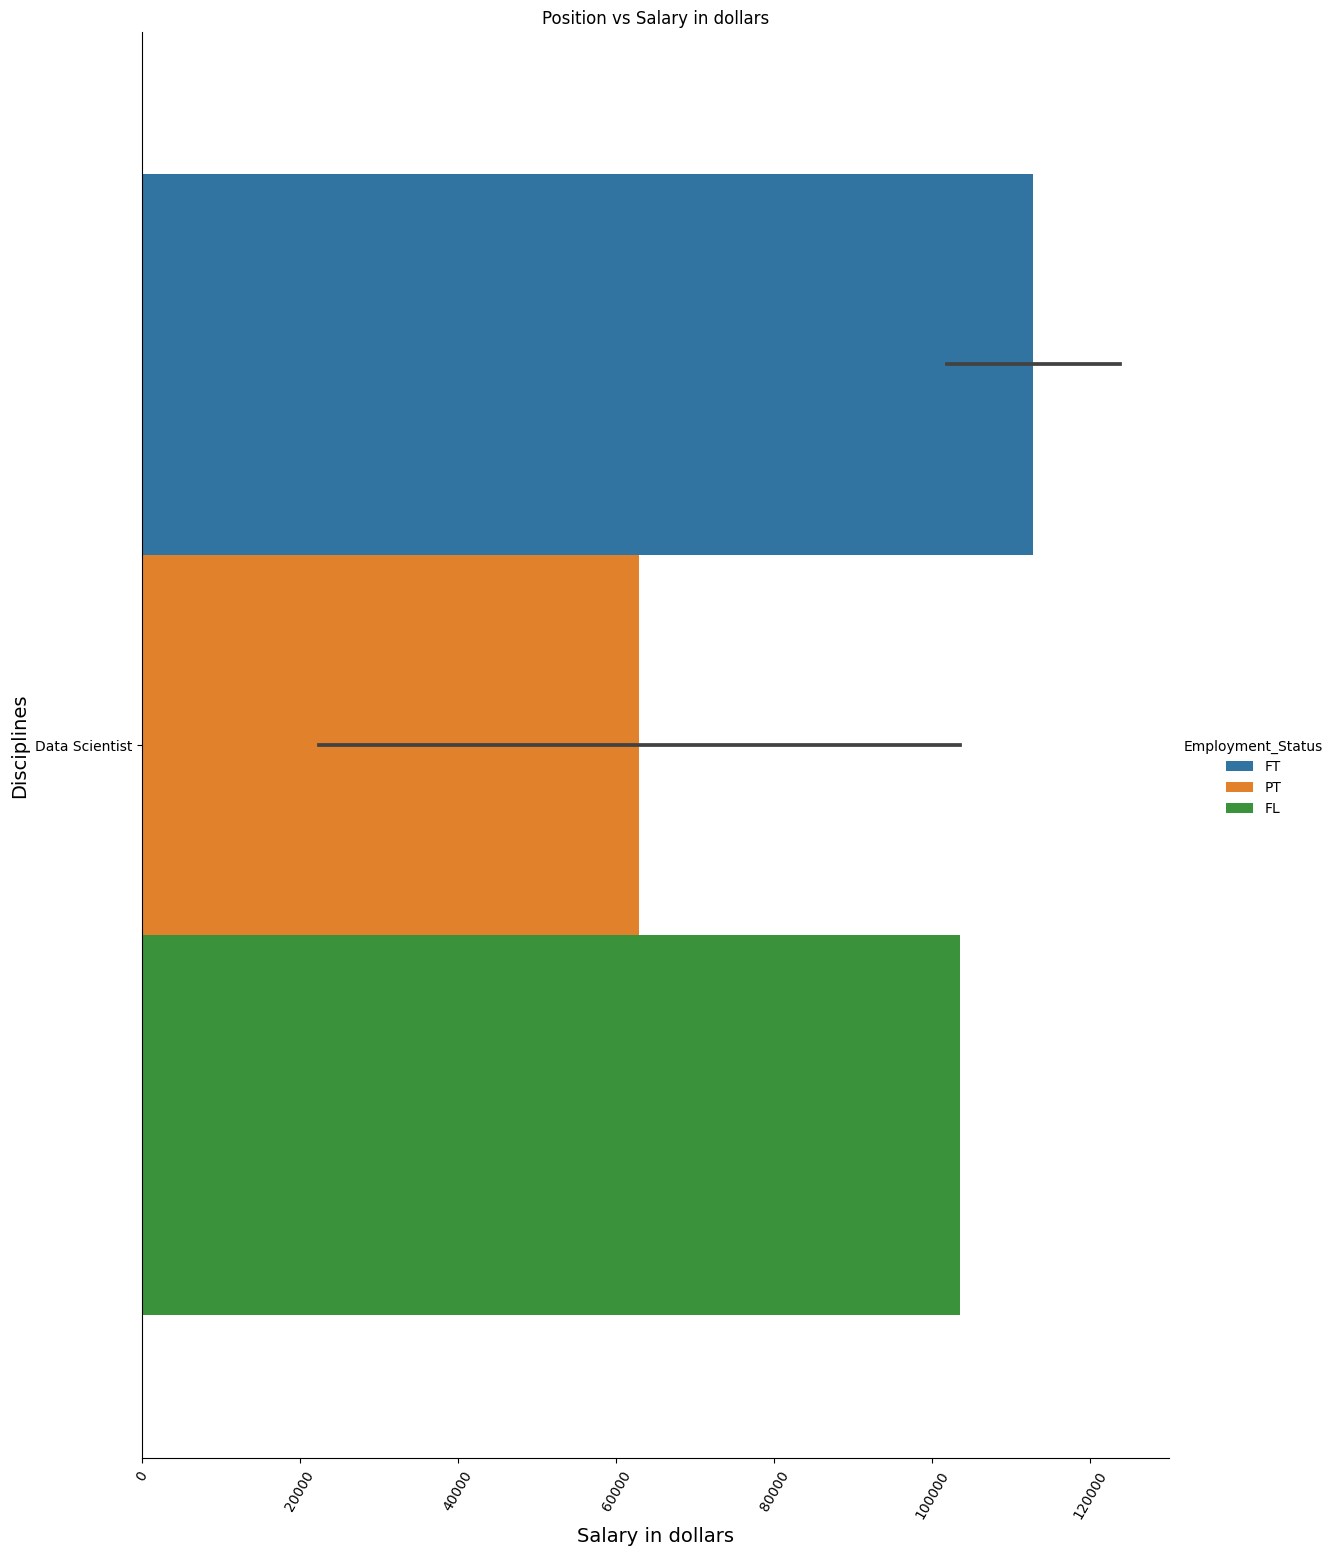

In [11]:
plt.figure(figsize = (20,60))

sns.catplot(x = 'Salary_In_Dollars',
            y = 'Designation',
            kind = "bar",
            hue = 'Employment_Status',
            height = 15,
            aspect = 0.8,
            data = df).set(title = "Position vs Salary in dollars");

plt.xticks(rotation = 60)
plt.xlabel("Salary in dollars",fontsize=14)
plt.ylabel("Disciplines",fontsize=14)

plt.show()

# Step 7: Exploring the salary distribution among employee locations depending on experience

<Figure size 1000x2500 with 0 Axes>

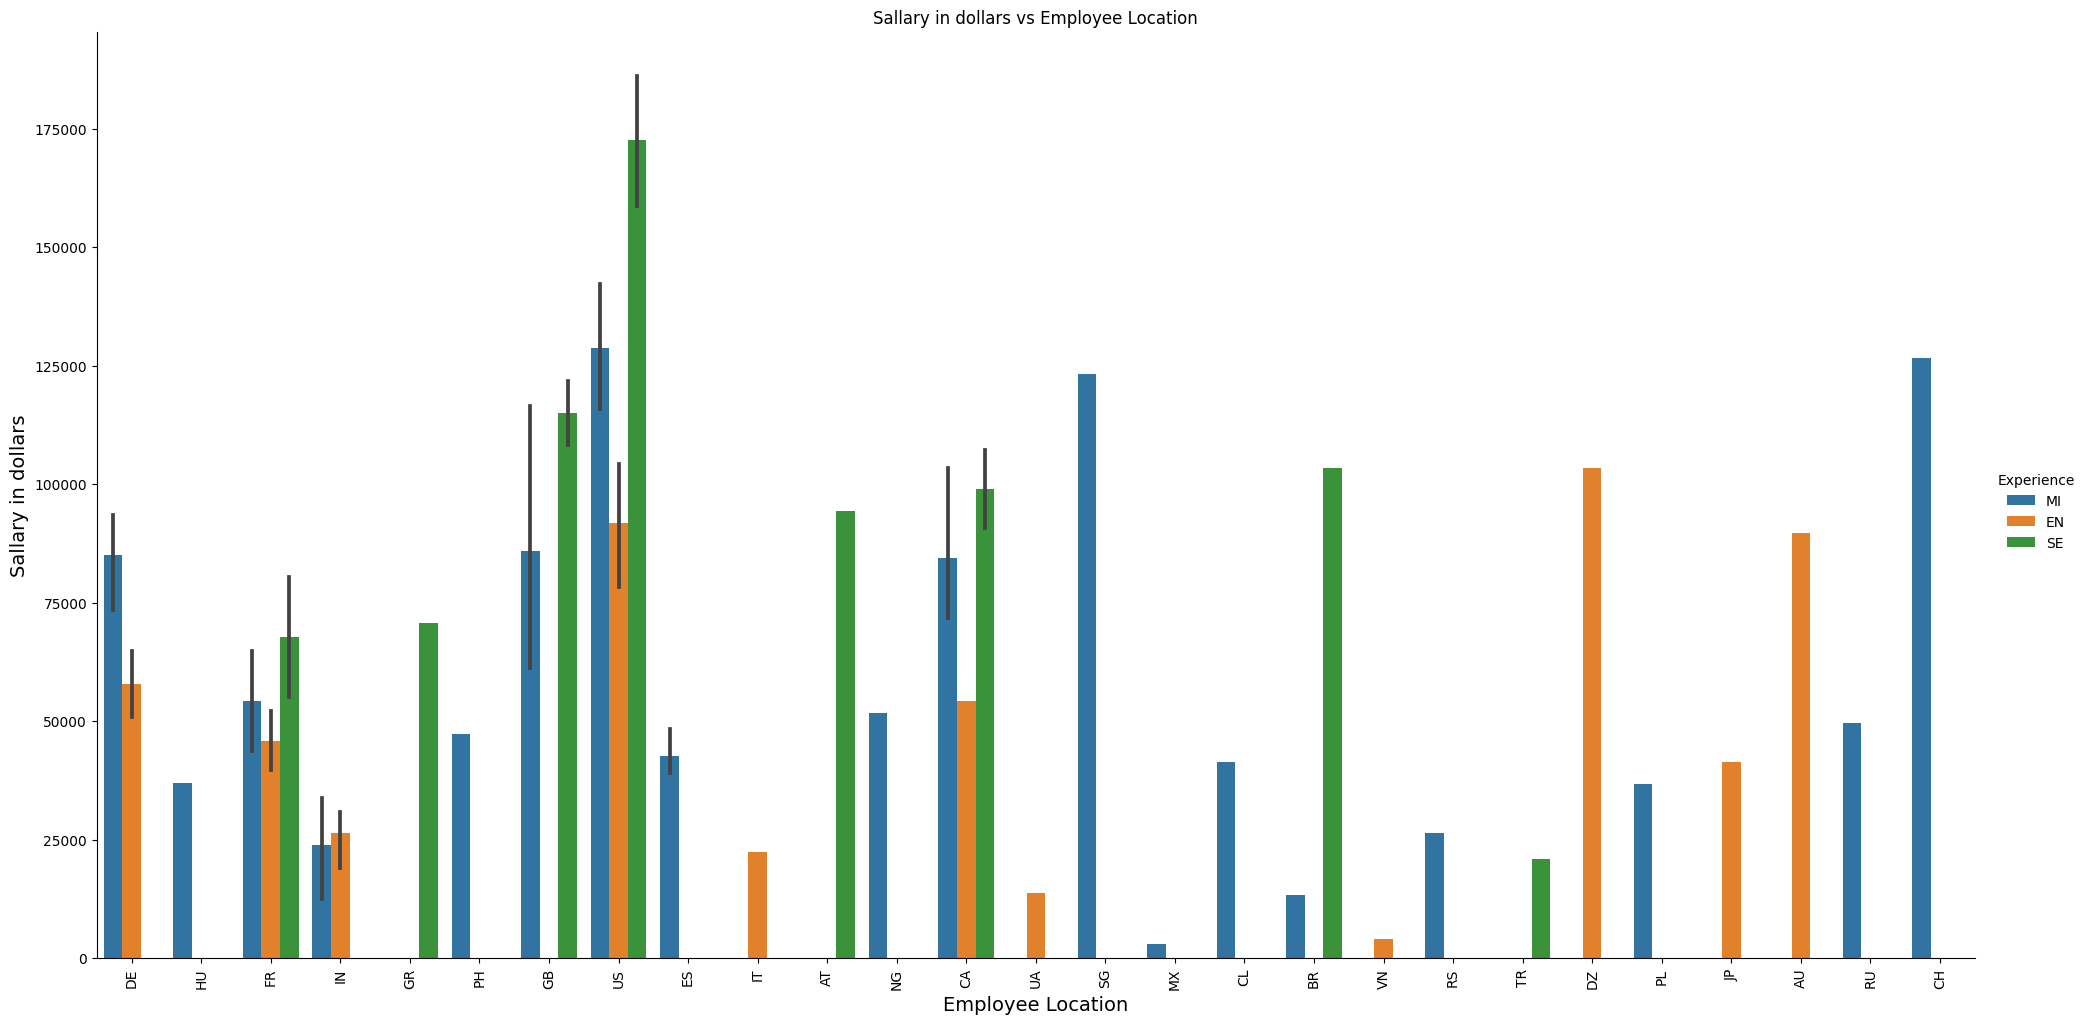

In [12]:
plt.figure(figsize = (10,25))

sns.catplot(x = 'Employee_Location',
            y = 'Salary_In_Dollars',
            kind = "bar",
            height = 10,
            hue = 'Experience',
            aspect = 2,
            data = df).set(title = "Sallary in dollars vs Employee Location");

plt.xticks(rotation = 90)
plt.xlabel("Employee Location",fontsize=14)
plt.ylabel("Sallary in dollars",fontsize=14)

plt.show()

# Step 8: Exploring the salary distribution among company locations depending on company size

<Figure size 1000x2500 with 0 Axes>

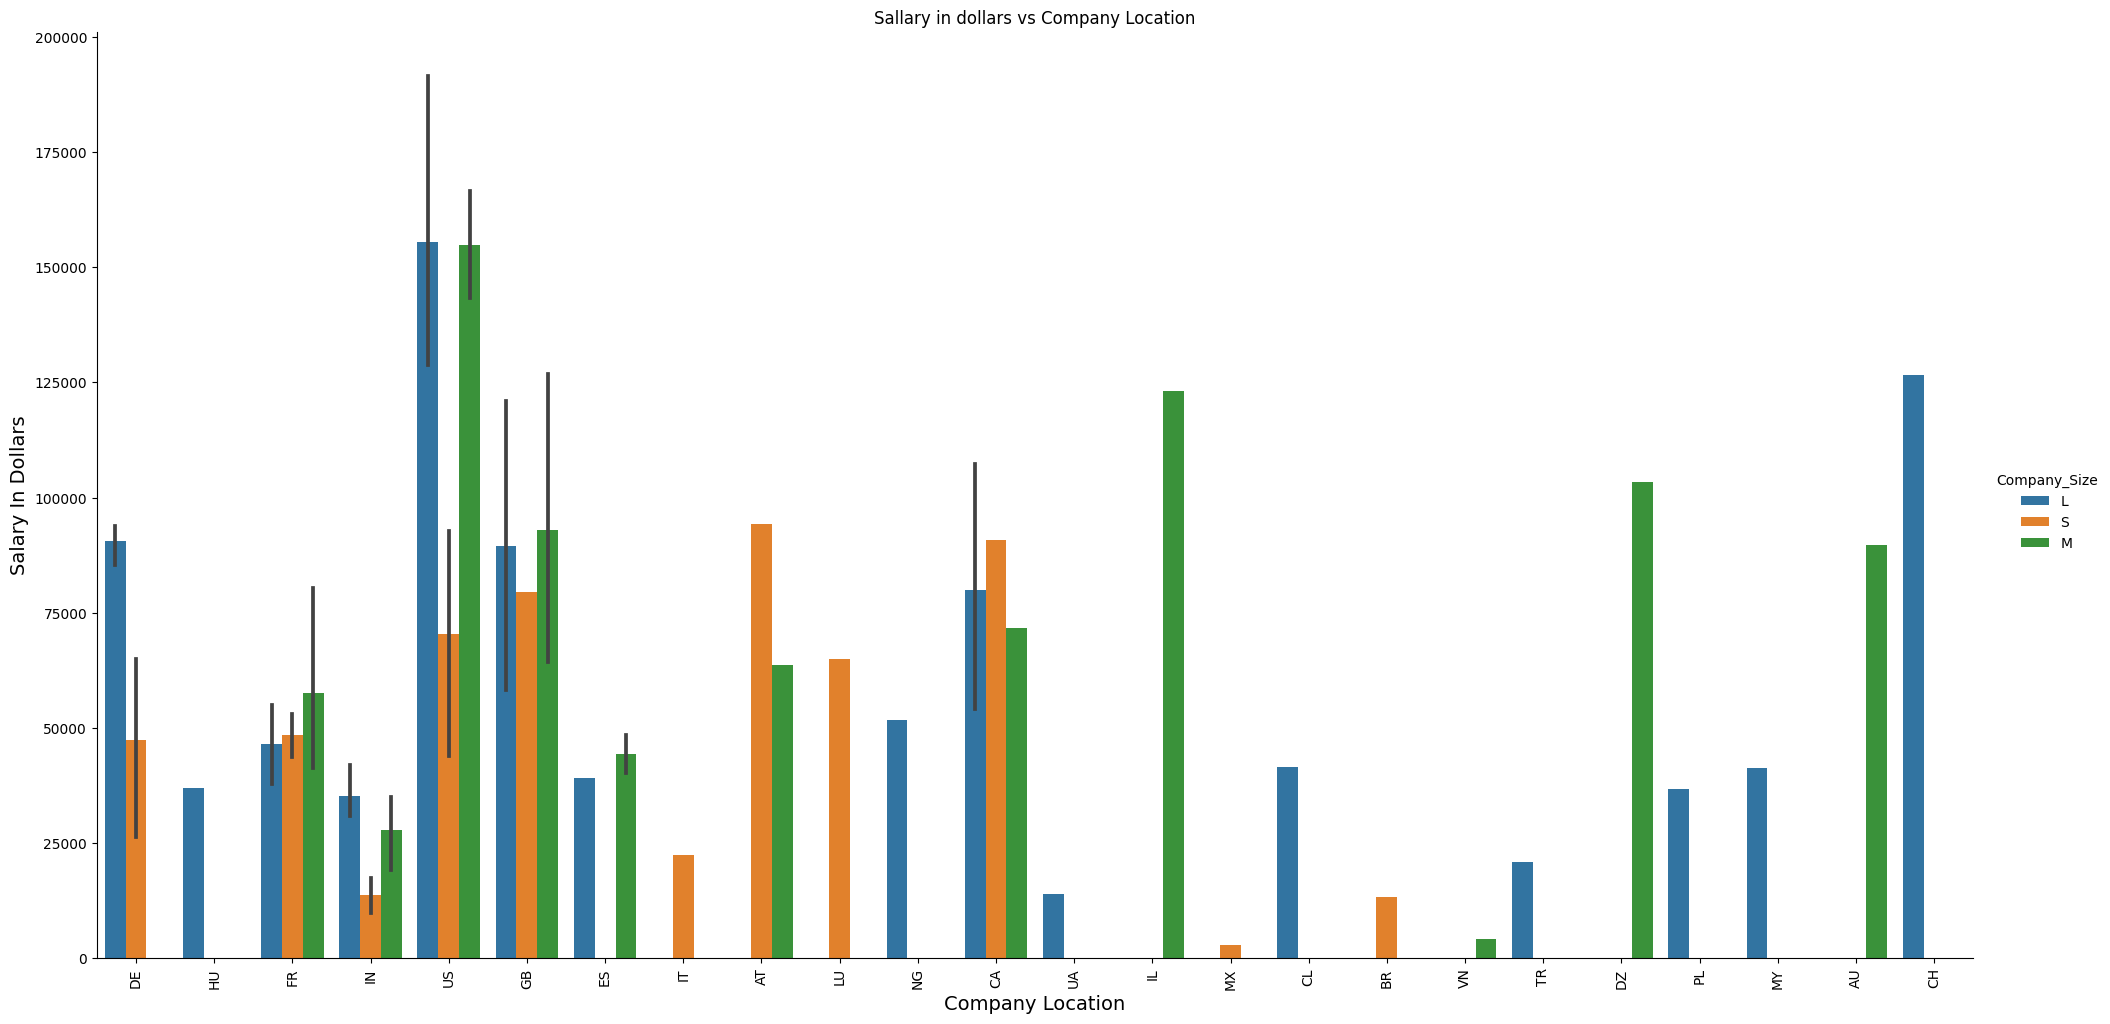

In [13]:
plt.figure(figsize = (10,25))

sns.catplot(x = 'Company_Location',
            y = 'Salary_In_Dollars',
            kind = "bar",
            height = 10,
            aspect = 2, 
            hue='Company_Size',
            data = df).set(title = "Sallary in dollars vs Company Location");

plt.xticks(rotation = 90)
plt.xlabel("Company Location",fontsize=14)
plt.ylabel("Salary In Dollars",fontsize=14)

plt.show()

# Step 9: Exploring the salary distribution among company locations depending on working conditions

<Figure size 1000x2500 with 0 Axes>

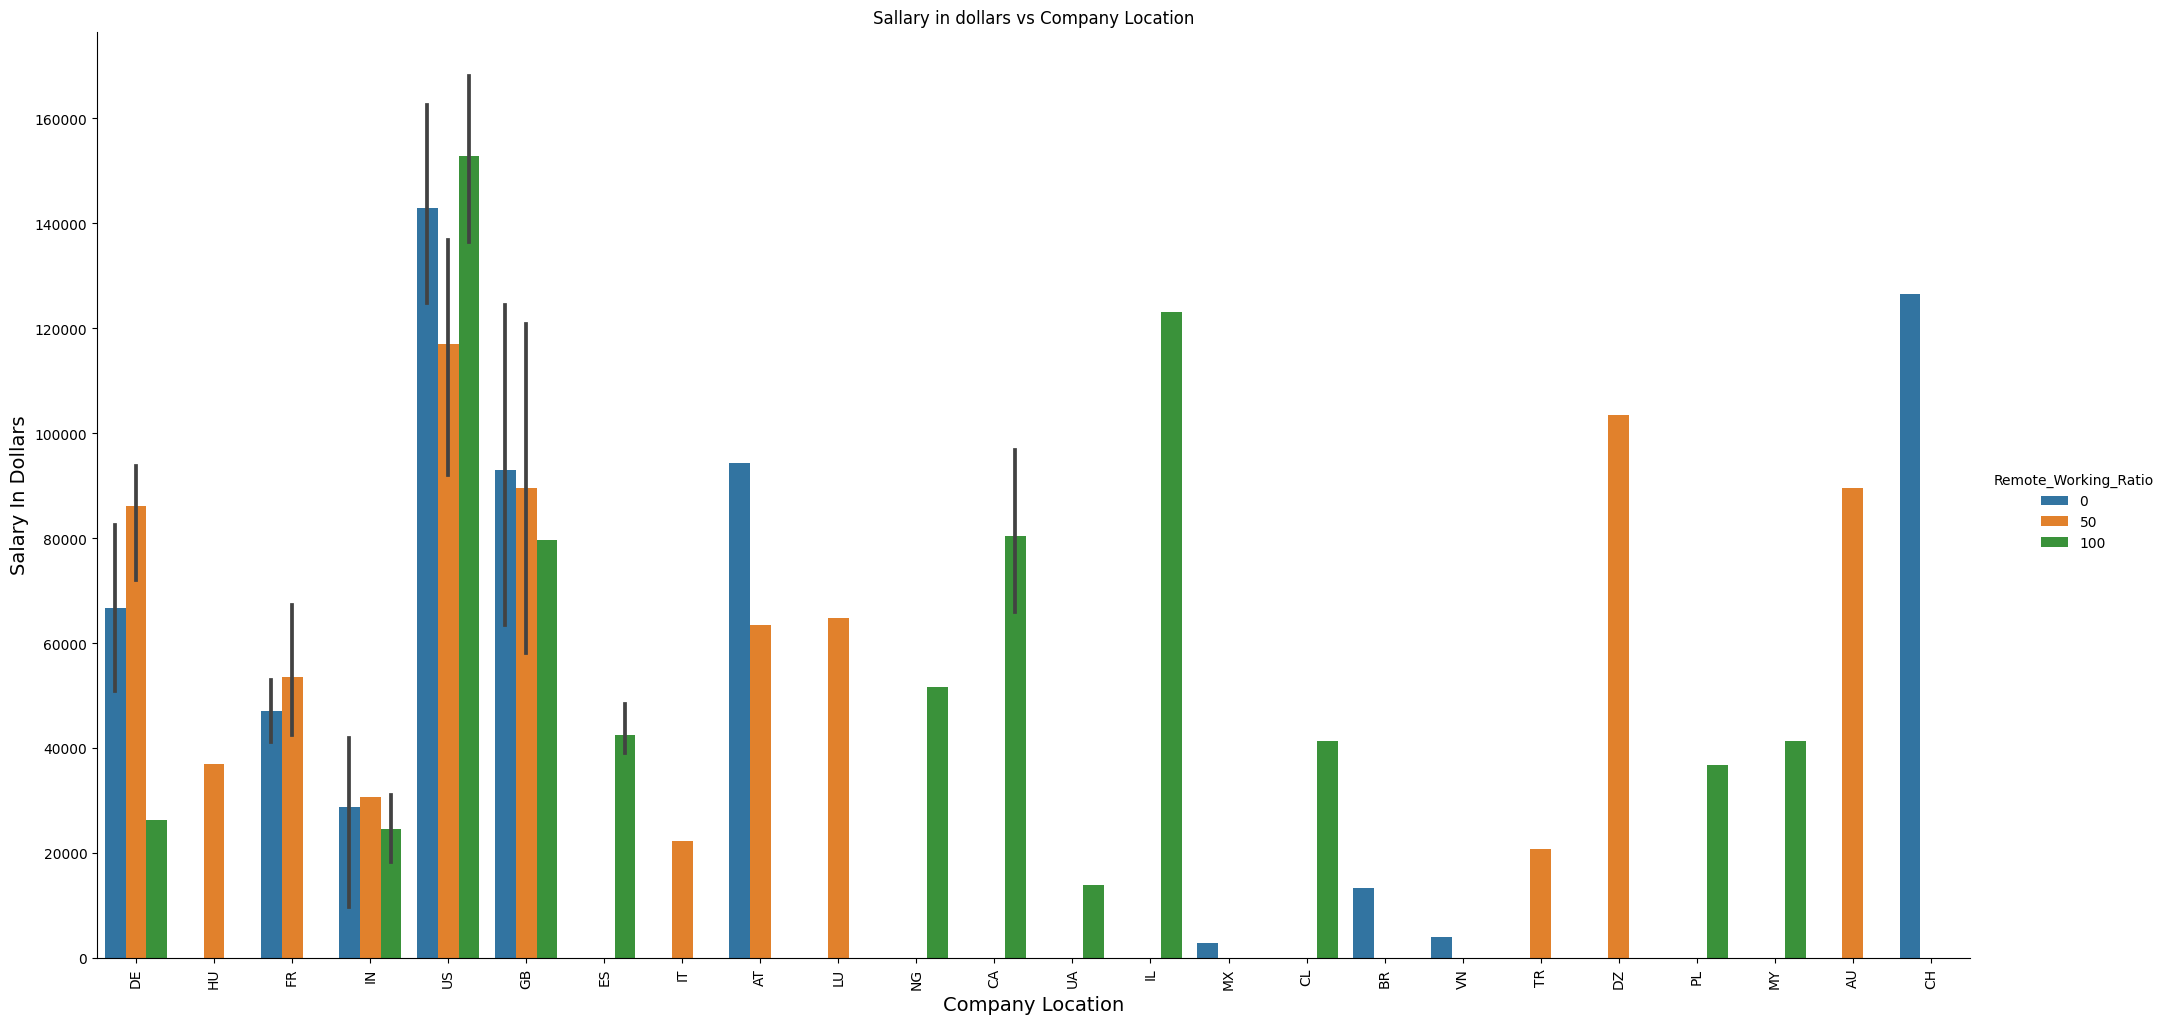

In [14]:
plt.figure(figsize = (10,25))

sns.catplot(x = 'Company_Location',
            y = 'Salary_In_Dollars',
            kind = "bar",
            height = 10,
            aspect = 2, 
            hue='Remote_Working_Ratio',
            data = df).set(title = "Sallary in dollars vs Company Location");

plt.xticks(rotation = 90)
plt.xlabel("Company Location",fontsize=14)
plt.ylabel("Salary In Dollars",fontsize=14)

plt.show()

# Step 10: Save on MlFlow

In [15]:
with mlflow.start_run() as run:
    mlflow.log_param('DESIGNATION', DESIGNATION)

From https://www.kaggle.com/code/sultansagynov/eda-data-science-fields-salary-categorization